# **Aprendizaje supervisado**
# SL05. Regresion Logística

El algoritmo de **regresión logística** es uno de los más utilizados en aprendizaje automático. Siendo su principal aplicación los problemas de clasificación binaria. Es un algoritmo simple en el que se pueden interpretar fácilmente los resultados obtenidos e identificar por qué se obtiene un resultado u otro. A pesar de su simplicidad funciona muy bien en muchas aplicaciones y se utiliza como referencia de rendimiento.

La regresión logística es una técnica de aprendizaje automático que proviene del campo de la estadística. A pesar de su nombre no es un algoritmo para aplicar en problemas de regresión, en los que se busca un valor continuo, sino que es un método para problemas de clasificación, en los que se obtienen un valor binario entre 0 y 1. Por ejemplo, un problema de clasificación es identificar si una operación dada es fraudulenta o no. Asociándole una etiqueta “fraude” a unos registros y “no fraude” a otros. Simplificando mucho es identificar si al realizar una afirmación sobre registro esta es cierta o no.

Con la regresión logística se mide la relación entre la variable dependiente, la afirmación que se desea predecir, con una o más variables independientes, el conjunto de características disponibles para el modelo. Para ello utiliza una función logística que determina la probabilidad de la variable dependiente. Como se ha comentado anteriormente, lo que se busca en estos problemas es una clasificación, por lo que la probabilidad se ha de traducir en valores binarios. Para lo que se utiliza un valor umbral. Los valores de probabilidad por encima del valor umbral la afirmación es cierta y por debajo es falsa. Generalmente este valor es 0,5, aunque se puede aumentar o reducir para gestionar el número de falsos positivos o falsos negativos.

En términos generales la regresión logísticas usa un **enfoque probabilístico**. En una regresión logística, la función $h_{\theta}(x) $ representa la probabilidad de que la variable de salida y sea 1, dado un conjunto de variables de entrada $x$ y los parámetros del modelo $\theta$. Es decir:

$$h_{\theta}(x) = p(y=1 \mid x; \theta)$$



Modelo de regresión logística:

Vemos en la primera ecuación una regresión lineal multivariable, expresada como:
<br><br>
$$h_{\theta}(x)=g(\theta^{T}x)$$
<br>
donde g(z) es la función sigmoide, definida como:
<br><br>
$$g(z) = \frac{1}{1+e^{-z}}$$
<br>
Al combinar ambas ecuaciones, obtenemos la función característica de la regresión logística:
<br><br>
$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$$
<br><br>
Esta función transforma la salida de la regresión lineal en un valor entre 0 y 1, lo que permite interpretarlo como una probabilidad.
<br><br>
<img src='https://drive.google.com/uc?export=view&id=1MeNaOMGnQE1uBOLfJAR4b53d0v630mHR' width="400" align="center" style="margin-right: 20px">

$\theta^{T}x$ debería tener valores **negativos** grandes para instancias negativas y valores **positivos** grandes para instancias positivas.

Definir un umbral:
<br><br>

* Predecir $y=1$ si $h_{\theta}(x) 	\geq0.5$
* Predecir $y=0$ si $h_{\theta}(x) 	< 0.5$

<img src='https://drive.google.com/uc?export=view&id=1esyo1Y8jCivlo7Xwyeyd0CWiVnWO6Ftk' width="400" align="center" style="margin-right: 20px">

Para entender el funcionamiento de la regresión logística utilizaremos un ejemplo.

### Cargar el dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Data set cargado.

iris = load_iris()
x = iris.data
y = iris.target
# Transformelo a data frame para visualizarlo
df = pd.DataFrame(x,columns = iris.feature_names)
df['species_id'] = y
species_map = {0:'setosa',1:'versicolor',2:'virginica'}
df['species_name'] = df['species_id'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## <font color='green'>Actividad 1</font>

Realice un analisis exploratorio del dataset Iris con el objetivo de indentificar la factibilidad de construir un clsificador de especies. ¿Qué especie se ve fácilmente separable?

### Estadistica descriptiva y visualizaciones

Hágalo para todas las especies, observe las diferencias.

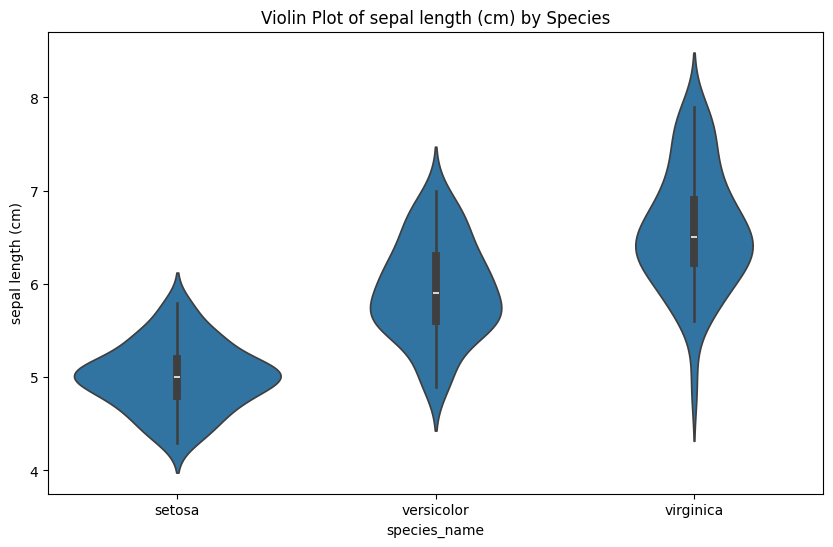

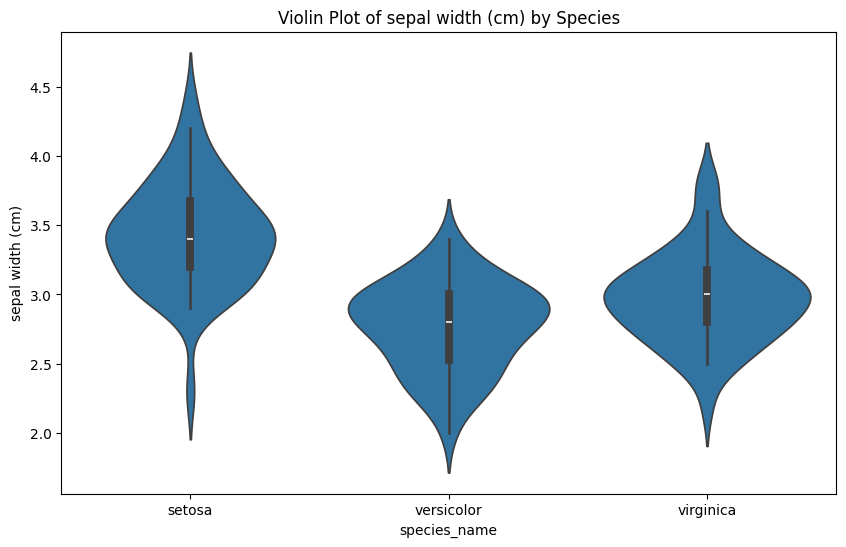

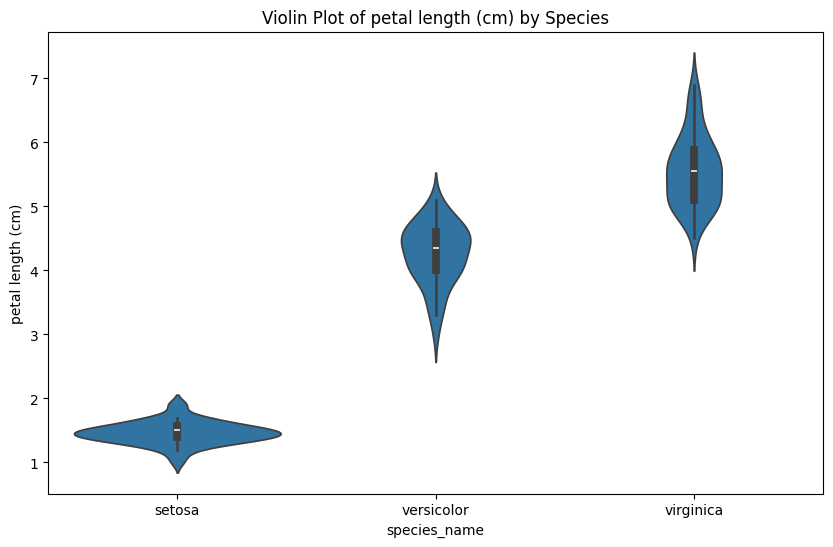

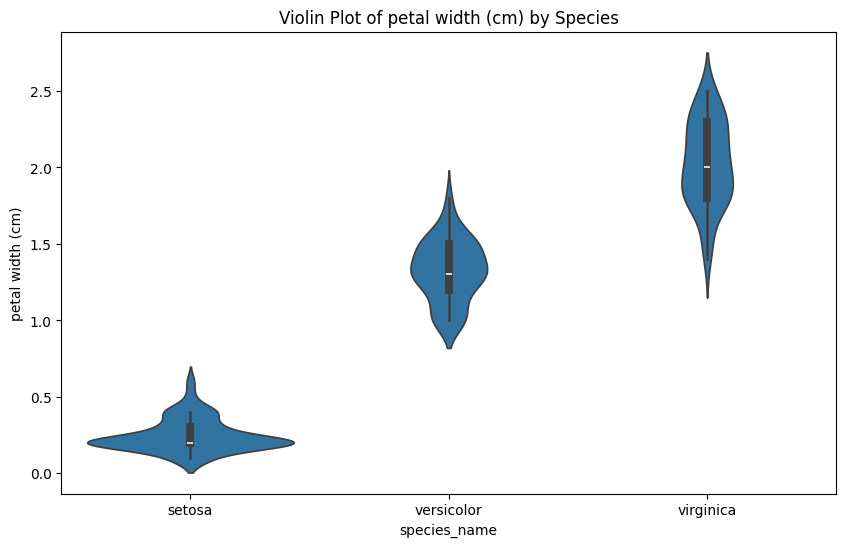

In [ ]:
import seaborn as sns

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Para cada feature en 'features' hacemos un violinplot
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='species_name', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Species')



Se observa en los violin plot que la especie **setosa** es más fácilmente separable porque sus valores se alejan de las otras dos en:
- petal width
- petal lenght
- sepal lenght (no tanto como los otros dos)

<font color='green'>Fin Actividad 1</font>

# <font color='purple' style='bold' size=5>**EXPERIMENTO** </font>


exploramos una forma alternativa de análisis exploratorio para identificar la especie más separable

Estadística descriptiva:
             sepal length (cm)                                              \
                         count   mean       std  min    25%  50%  75%  max   
species_name                                                                 
setosa                    50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor                50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica                 50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

             sepal width (cm)         ... petal length (cm)       \
                        count   mean  ...               75%  max   
species_name                          ...                          
setosa                   50.0  3.428  ...             1.575  1.9   
versicolor               50.0  2.770  ...             4.600  5.1   
virginica                50.0  2.974  ...             5.875  6.9   

             petal width (cm)                                            
                       

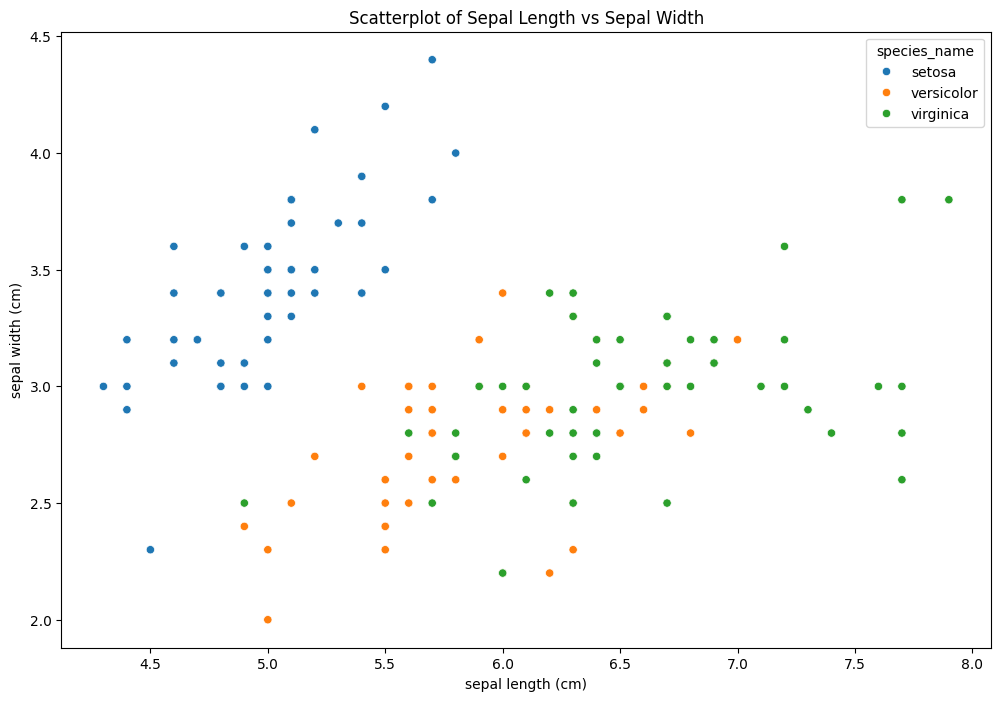

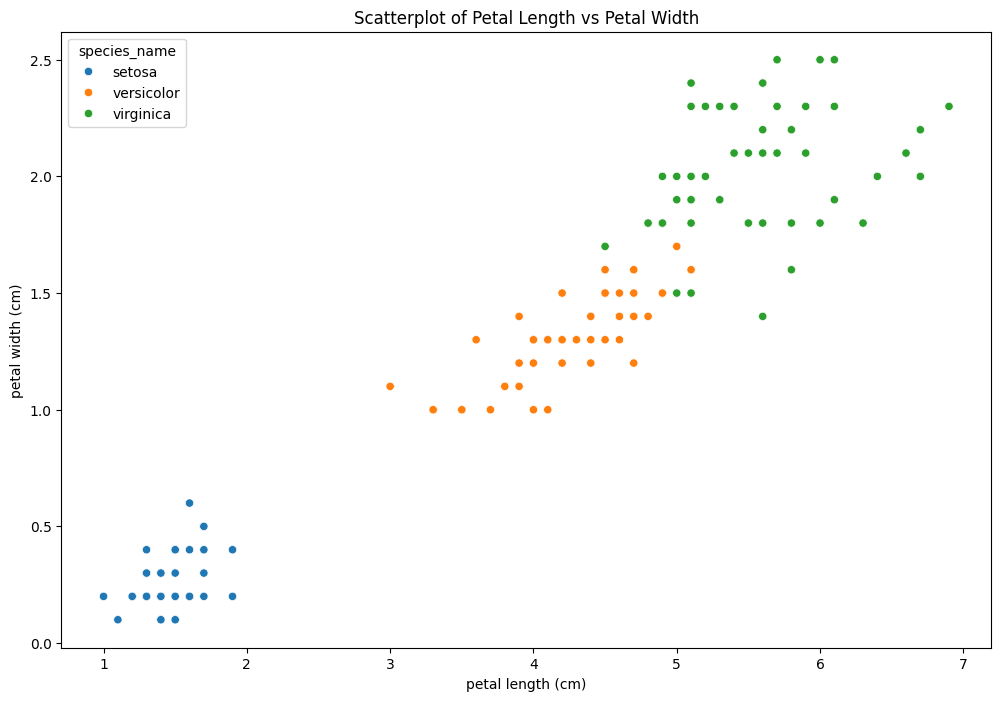

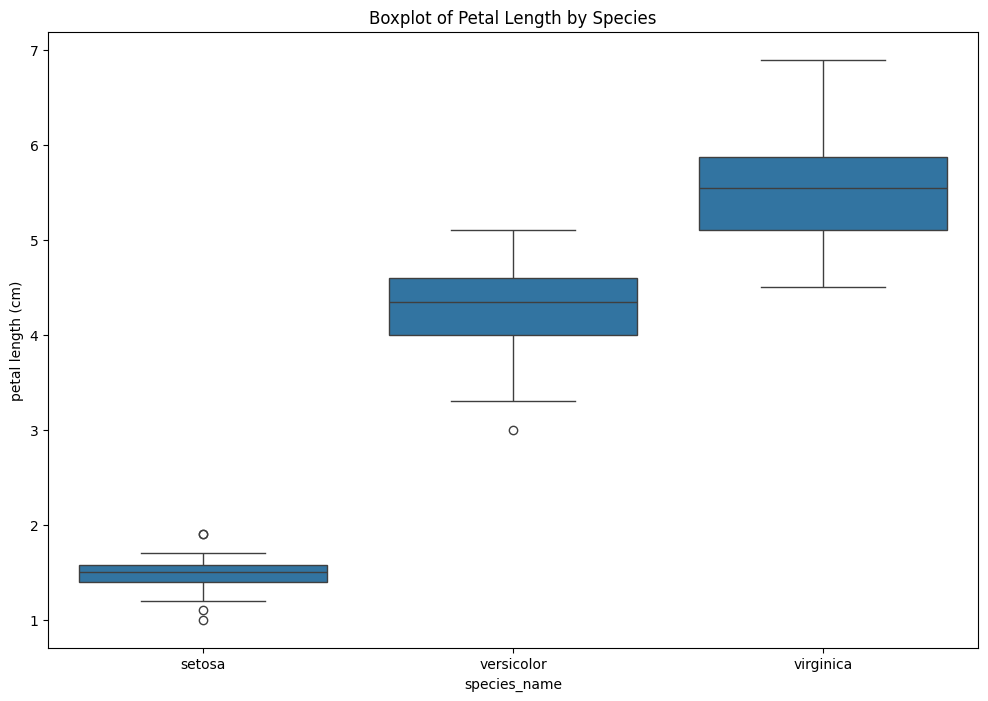

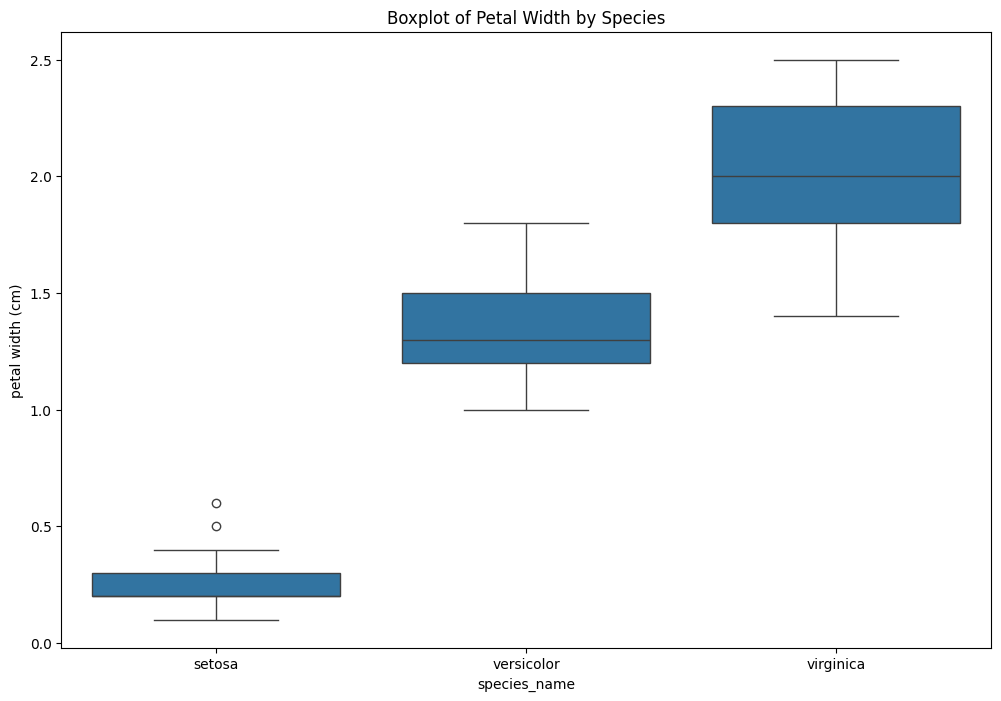

<Figure size 1200x1000 with 0 Axes>

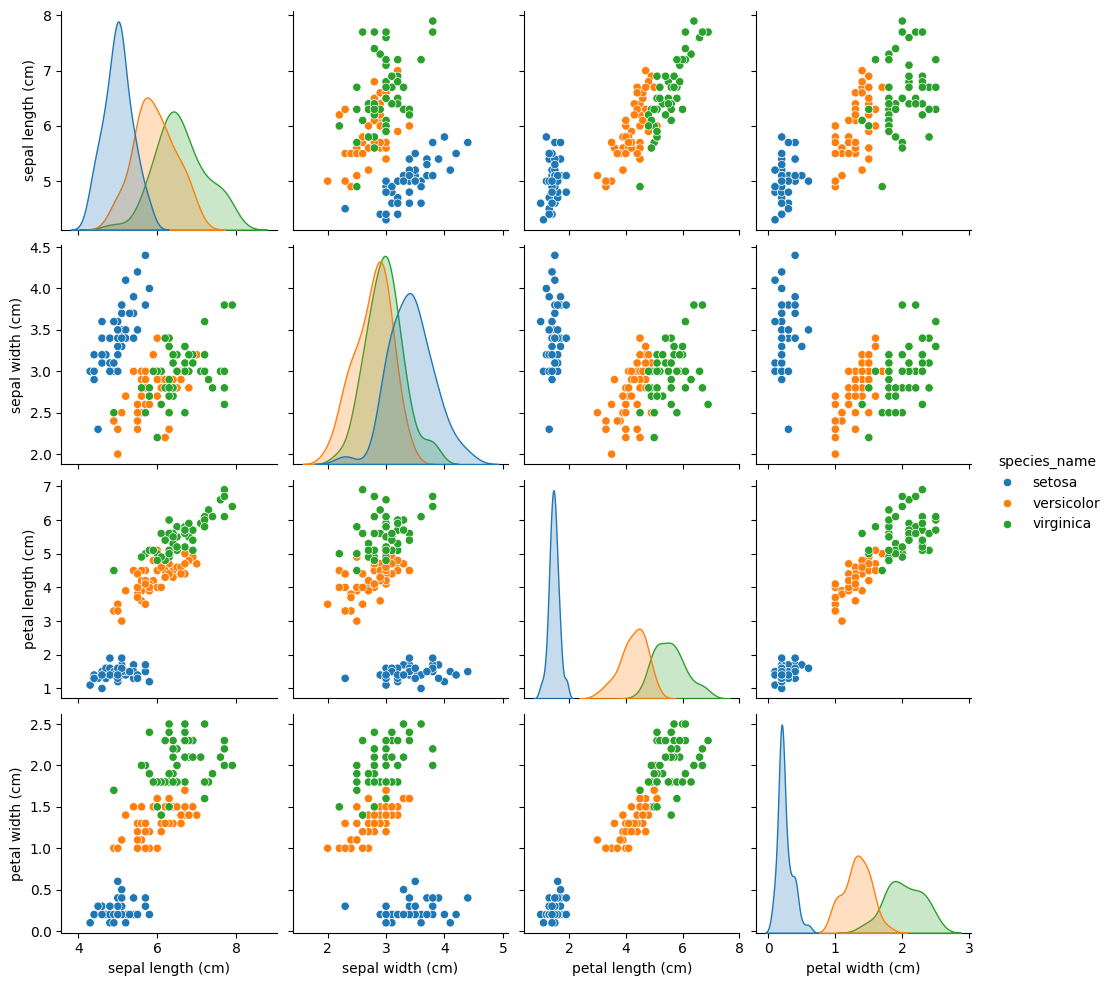

In [ ]:
# Cargar el conjunto de datos Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species_name'] = iris.target_names[iris.target]

# Estadística descriptiva
print("Estadística descriptiva:")
print(df.groupby('species_name')[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].describe())


# Scatterplots para visualizar relaciones entre características
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species_name', data=df)
plt.title('Scatterplot of Sepal Length vs Sepal Width')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species_name', data=df)
plt.title('Scatterplot of Petal Length vs Petal Width')
plt.show()

# Boxplots para comparar distribuciones
plt.figure(figsize=(12, 8))
sns.boxplot(x='species_name', y='petal length (cm)', data=df)
plt.title('Boxplot of Petal Length by Species')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='species_name', y='petal width (cm)', data=df)
plt.title('Boxplot of Petal Width by Species')
plt.show()

# Pairplot para visualizar todas las relaciones entre características
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species_name')
plt.show()


Con este anpalisis exploratorio, también podemos identificar que la especie setosa es la más separable, con atributos de pétalo menores y con una desviación estandar menor.
###<font color='purple'>**FIN EXPERIMENTO** </font>

### Adaptando el data set a un problema binario.

Como se vió en las visualizaciones anteriores. Vamos a reconocer setosa de las otras especies. Para esto debemos adaptar nuestra variable de salida.

``` python
y1 = np.where(y==2, 1, y)
print(y1)
```



In [ ]:
y1 = np.where(y==2, 1, y)
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### Separar conjunto de entrenamiento y validación

Utilice el mismo método que en regresión lineal para realizar split y LogisticRegression para la regresión logistica.





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.33, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### Verificación

```python
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,len(y_test)):
  print (y_test[i],probabilidades[i])

```



In [ ]:
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,10):
  print (y_test[i],probabilidades[i])

1 [0.0052293 0.9947707]
0 [0.95161087 0.04838913]
1 [7.73838831e-06 9.99992262e-01]
1 [0.00694228 0.99305772]
1 [0.00265201 0.99734799]
0 [0.95725164 0.04274836]
1 [0.06346019 0.93653981]
1 [7.70748440e-04 9.99229252e-01]
1 [0.00358118 0.99641882]
1 [0.02947981 0.97052019]


## <font color='blue'>**¿Cómo funciona la regresión logística?**</font>

Dado un conjunto de entradas X, queremos asignarlas a una de dos categorías posibles (0 o 1). La regresión logística modela la probabilidad de que cada entrada pertenezca a una categoría particular.

### Contruya una función sigmoidea


In [ ]:
# Función sigmoidea.

def sigmoidea(z):
    return 1 / (1 + np.exp(-z))

### ¿Como medimos que tan buenos esta siendo nuestro modelo?
### La función de perdida. Entropía cruzada

La entropía de una variable aleatoria X, es el nivel de incertidumbre inherente a las posibles variables de resultado.

Sea $p(x)$ una distribución de probabilidad de una variable aleatoria $X$. Entonces la **entropía** se define por:
<br><br>
$$ H(X) =- \sum_x p(x) log(p(x))$$ para el caso discreto.
<br>

![Log](https://drive.google.com/uc?export=view&id=1RW2paVAoK7kmrGl8C-Y5Zim6YpeLtVsF)


Veamos un ejemplo concreto:

![Entropia](https://drive.google.com/uc?export=view&id=13pUhML_hNg6sdHG9h5lToPu1Mxx9uPuB)


Calcule la entropía para cada uno de los contenedores.

1. $ -[\frac{26}{30}log_2(\frac{26}{30}) + \frac{4}{30}log_2(\frac{4}{30}) ]$ = 0.5665

2. =  0.9968

3. =  0

Nuestra entropía esta midiendo un desorden (Termodinamica, Mecánica estadística, o la cantidad de ruido que contiene una señal (Teoria de la información).

Entropia Cruzada:

También se llama pérdida logarítmica o pérdida logística. Cada probabilidad de clase predicha se compara con la salida deseada de clase real 0 o 1 y se calcula una puntuación/pérdida que penaliza la probabilidad en función de qué tan lejos está del valor esperado real. La penalización es de naturaleza logarítmica, lo que genera una puntuación grande para las diferencias grandes cercanas a 1 y una puntuación pequeña para las diferencias pequeñas que tienden a 0.

![EntropiaCruzada](https://drive.google.com/uc?export=view&id=1VlvM3dWPbapiJFUs_cVe2gkAlRHCrEGz)


$$L{CE} = - \sum_{i=1}^n t_ilog(p_i)$$, para $n$ clases.

Donde $t_i$ es el truth label y $p_i$ la probabilidad obtenida de la función softmax para la $i^{th}$ clase.

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

En el caso del ejemplo tenemos:

$L_{CE} = -1log_2(0.936)+0+0+0$ = 0.095

```python
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
```



In [ ]:
# Función de loss

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

### El gradiente

1. **¿Que es el gradiente?:** El gradiente es un vector que es tangente de una función y apunta en la dirección de mayor aumento de esta función. El gradiente es cero en un máximo o mínimo local porque no hay una única dirección de aumento. En matemáticas, el gradiente se define como una derivada parcial para cada variable de entrada de la función.

$$ \nabla f(x,y) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$$

2. **¿Que es el gradiente descendente?:**  Como el gradiente es un vector que apunta al mayor aumento de una función, el gradiente negativo es un vector que apunta al mayor descenso de una función. Por lo tanto, podemos minimizar una función moviéndonos iterativamente **un poco** en la dirección del gradiente negativo. Esa es la lógica del descenso en gradiente.

Dado un punto de partida $(X_1^{0}, ...,X_n^{0})$
$$ x_1^{(i+1)} = x_1^{(i)} - \alpha \frac{\partial f}{\partial x_1}(x^{(i)})$$

$$ x_n^{(i+1)} = x_n^{(i)} - \alpha \frac{\partial f}{\partial x_n}(x^{(i)})$$


![GradientDescent](https://drive.google.com/uc?export=view&id=15VIlre07RyAx_VsUFVtS7Hyt1Nk5w3WN)

Un parámetro importante en el descenso de gradientes es la tasa de aprendizaje (LearningRate, $\alpha$), que determina el tamaño de cada paso. Cuando la tasa de aprendizaje es demasiado grande, el descenso en pendiente puede saltar a través del valle y terminar en el otro lado. Esto conducirá a la divergencia de la función de costos. Por otro lado, cuando la tasa de aprendizaje es demasiado pequeña, el algoritmo tardará mucho en converger. Por lo tanto, se necesita una velocidad de aprendizaje adecuada antes de que comience el descenso de gradiente.


![Learningrate](https://drive.google.com/uc?export=view&id=1-EPuN5D59Phhhk-FKCfzz3yqk2mbsC39)  


La normalización juega un papel importante en Gradient Descent. Si las características no están normalizadas, las características a gran escala dominarán la actualización, por lo que el algoritmo generará una ruta de aprendizaje en zigzag. Se necesitan muchos pasos innecesarios y más tiempo para llegar al mínimo. Una vez normalizadas todas las características, la función de coste adquiere una forma más esférica. El algoritmo Gradient Descent va directo al mínimo. Una forma de normalizar los datos es restar la media a cada valor y luego dividir el resultado por la desviación estándar. Alternativamente, se puede utilizar directamente la función Scaler de Scikit-Learn para realizar este proceso..







## Las ecuaciones:

$$
h_{\theta}(x) = \sigma(\theta^Tx)
$$
Donde
<br><br>
$$\sigma = \frac{1}{1+ e^{-z}}$$
<br>
Además sea
<br><br>
$$z(\theta) = \theta^Tx $$
<br>
Se define la función de pérdida (Loss Function) de entropía cruzada como:

$$
L(y,\hat{y}) = -[y \log (\hat{y}) + (1-y) \log(1-\hat{y})]
$$
<br>
Sustituyendo $\hat{y} = \sigma(z(\theta))$:
<br><br>
$$
L(y,\hat{y}) = -[y \log (\sigma(z(\theta))) + (1-y) \log(1-\sigma(z(\theta)))]
$$
<br>
Calculamos la derivada con respecto a $\theta_j$:
<br><br>
$$
\frac{\partial L(y,\hat{y})}{\partial \theta_j} = -\left[\frac{\partial}{\partial \theta_j} \left( y\log (\sigma(z(\theta))) + (1-y) \log(1-\sigma(z(\theta))) \right) \right]
$$
<br>
Aplicando la regla de la cadena:
<br><br>
$$
\frac{\partial L(y,\hat{y})}{\partial \theta_j} = -\left[\frac{y}{\sigma(z(\theta))} \frac{\partial \sigma(z(\theta))}{\partial \theta_j} + \frac{1-y}{1-\sigma(z(\theta))} \frac{\partial (1 - \sigma(z(\theta)))}{\partial \theta_j}\right]
$$
<br>
Reorganizando:
<br><br>
$$
\frac{\partial L(y,\hat{y})}{\partial \theta_j} = \left[\frac{1-y}{1-\sigma(z(\theta))} -\frac{y}{\sigma(z(\theta))}\right] \frac{\partial \sigma(z(\theta))}{\partial \theta_j}
$$
<br>
⸻

Apliquemos la derivada de la sigmoide:
<br><br>
$$
\sigma(z){\prime}= \sigma(z)(1-\sigma(z))
$$
<br>
Sustituyéndola en la ecuación anterior:
<br><br>
$$
\frac{\partial L(y,\hat{y})}{\partial \theta_j} = \left[\frac{\sigma(z(\theta)) - y}{\sigma(z(\theta)) [1 - \sigma(z(\theta))]} \right] \; \sigma(z(\theta)) (1-\sigma(z(\theta)))x_j
$$
<br>
Simplificando:
<br><br>
$$
\frac{\partial L(y,\hat{y})}{\partial \theta_j} = (\sigma(z(\theta)) - y) x_j
$$





```python
gradiente = np.dot(X.T, (h - y)) / y.shape[0]
lr = 0.01
theta -= lr * gradient
```

```python
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))
```

```python
def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
```

## <font color='green'>Actividad 2</font>

Construya la regresión logistica.

Defina una funcion fit(X,y):

1. Al dataset $X$, se le agrega un intercepto, utilizando la función *add_intercept*.
2. Definimos un array theta que contenfa los pesos de la regresión logistica, los puede iniciar en 0 o aleatorios.
3. Itere los siguientes pasos una cantidad determinada de veces, por ejemplo 20.000

    a.  Haga un forward (multiplique el vector de entrada con theta, utilice la función dot)

    b. Aplique la función gradiente.

    c. Aplique el learning rate y actualice theta.
4. Prediga el conjunto de test con la función predict_probs
5. Compare theta y los resultados con la función utilizada en sklearn.

In [ ]:
# Tu código aquí ...

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))


# Defina una función fit(X, y) donde:
# 1. Al dataset  X , se le agrega un intercepto, utilizando la función add_intercept.

def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

def fit (X,y):
    X = add_intercept(X)
    # 2. Definimos un array theta que contenfa los pesos de la regresión logistica, los puede iniciar en 0 o aleatorios.
    theta = np.zeros(X.shape[1])
    # 3. Itere los siguientes pasos una cantidad determinada de veces, por ejemplo 20.000
    for i in range(20000):
        # a.  Haga un forward (multiplique el vector de entrada con theta, utilice la función dot)
        h = sigmoid(np.dot(X, theta))
        # b. Aplique la función gradiente.
        gradiente = np.dot(X.T, (h - y)) / y.shape[0]
        # c. Aplique el learning rate y actualice theta.
        lr = 0.01
        theta -= lr * gradiente

    return theta

# obtener theta
theta = fit(x_train,y_train)


# 4. Prediga  el conjunto de test con la función predict_probs
# (antes hacemos una funcion sigmoid)
#para que tenga la misma dimensionalidad que x_train, le agregamos intercepto
x_test = add_intercept(x_test)
fitted = predict_probs(x_test,theta)
print(fitted)


# 5. Compare theta y los resultados con la función utilizada en sklearn
from sklearn.linear_model import LogisticRegression
regresion_logistica = LogisticRegression()
regresion_logistica.fit(x_train, y_train)





[9.99321550e-01 2.94389386e-03 9.99999839e-01 9.99021063e-01
 9.99443910e-01 4.91819167e-03 9.80171238e-01 9.99891031e-01
 9.99747648e-01 9.93597006e-01 9.99835628e-01 7.59062236e-03
 1.44270377e-03 8.04242134e-03 2.19458762e-03 9.98781785e-01
 9.99992082e-01 9.95684226e-01 9.99112673e-01 9.99990543e-01
 1.18307675e-02 9.99780218e-01 8.70832181e-03 9.99989033e-01
 9.99981324e-01 9.99943908e-01 9.99994372e-01 9.99991009e-01
 1.01815334e-02 1.37205179e-02 7.51444996e-04 4.97407795e-04
 9.96311777e-01 7.32764748e-03 5.30564017e-03 9.99946476e-01
 9.97647321e-01 3.35102165e-03 2.20517395e-03 8.15682848e-04
 9.99956779e-01 9.97576309e-01 9.98817520e-01 8.86521608e-04
 1.94633494e-03 9.92638543e-01 9.99868939e-01 9.99955136e-01
 9.97188659e-01 9.99989742e-01]


LogisticRegression()

In [ ]:
#redondeamos cada valor de fitted a 0s o 1s en un nuevo array
fitted_redondeado = np.round(fitted)
print(fitted_redondeado)


[1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1.]


In [ ]:
#comparamos fitted_redondeado con los valores de y_test
print(fitted_redondeado == y_test)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


Todos los valores fueron obtenidos de manera correcta, lo que nos hace pensar que está sobreajustado

In [ ]:
#comparamos con scikitlearn

regresion_logistica = LogisticRegression()
regresion_logistica.fit(x_train, y_train)
y_pred = regresion_logistica.predict(x_test)

print(y_test == y_pred)


92     True
44     True
7      True
21     True
95     True
75     True
20     True
121    True
26     True
19     True
81     True
88     True
143    True
117    True
23     True
77     True
138    True
73     True
14     True
142    True
123    True
62     True
83     True
74     True
42     True
60     True
40     True
45     True
87     True
124    True
41     True
131    True
70     True
46     True
126    True
54     True
85     True
114    True
38     True
101    True
149    True
136    True
113    True
97     True
141    True
36     True
37     True
13     True
68     True
11     True
Name: species_name, dtype: bool


Al analizar el rendimiento de Scikitlearn, vemos que ambos modelos rindieron de manera perfecta, lo que nos hace sospechar que están ambos sobreajustados

<font color='green'>Fin Actividad 2</font>

### Métricas de Evaluación de Modelos de Clasificación

1. **Verdaderos Positivos (True Positives, TP)**:
   Casos en los que el modelo predice correctamente la clase positiva, la de interes principal.

2. **Falsos Positivos (False Positives, FP)**:
   Casos en los que el modelo predice la clase positiva incorrectamente.
   - Ejemplo: El modelo predice que una persona tiene una enfermedad (positivo), pero en realidad no la tiene.

3. **Verdaderos Negativos (True Negatives, TN)**:
   Casos en los que el modelo predice correctamente la clase negativa.

4. **Falsos Negativos (False Negatives, FN)**:
   Casos en los que el modelo predice la clase negativa incorrectamente.
   - Ejemplo: El modelo predice que una persona no tiene una enfermedad (negativo), pero en realidad sí la tiene.

5. **Precisión (Precision)**:
   La precisión mide la proporción de verdaderos positivos entre el total de positivos predichos.
   $$
   \text{Precisión} = \frac{TP}{TP + FP}
   $$

6. **Exhaustividad (Recall)**:
   La exhaustividad mide la proporción de verdaderos positivos entre el total de positivos reales.
   $$
   \text{Exhaustividad} = \frac{TP}{TP + FN}
   $$

7. **Exactitud (Accuracy)**:
   La exactitud mide la proporción de predicciones correctas entre el total de predicciones.
   $$
   \text{Exactitud} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

8. **Puntuación F1 (F1-Score)**:
   La puntuación F1 es la media armónica de la precisión y la exhaustividad.
   $$
   \text{F1-Score} = \frac{2 \cdot \text{Precisión} \cdot \text{Exhaustividad}}{\text{Precisión} + \text{Exhaustividad}}
   $$


## <font color='green'>Actividad 3</font>
**Objetivo**: Usar directamente las herramientas de *scikit-learn* para construir un clasificador que distinga las tres clases del conjunto de datos *Iris*, y posteriormente, generar la Matriz de Confusión junto con las métricas de evaluacion (Exactitud, Precisión, Recall, F1, etc.).

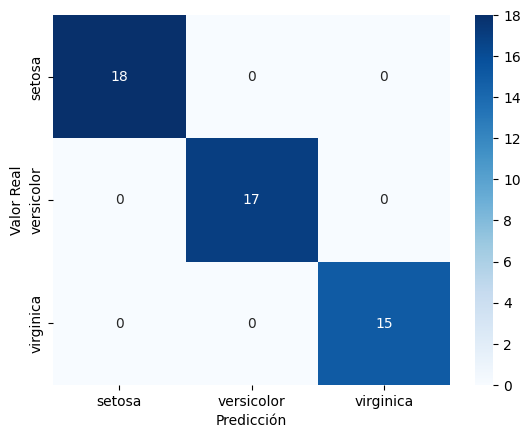

Exactitud: 1.0
Precisión: 1.0
Recall: 1.0


In [ ]:
# el df con los datos de iris ya está cargado como df

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#construir clasificador que distinga las tres clases del conjunto iris
x = df.drop('species_name', axis=1)
y = df['species_name']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=21)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# generar matriz de confusión para evaluar exactitud, precisión, recall y f1
y_pred = log_reg.predict(x_test)
matriz_confusion = confusion_matrix(y_test, y_pred)

#plotear matriz
import seaborn as sns
species_names = ['setosa', 'versicolor', 'virginica']
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', yticklabels=species_names, xticklabels=species_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')


plt.show()

#mostrar eactitud, precision, recall y f1
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

EL modelo rindió perfecto, nuevamente sospechamos que puede estar sobreajustado.

<font color='green'>Fin Actividad 3</font>

# 🔴 CASO 1: PRIORIDAD EN EL RECALL (SENSIBILIDAD)

## **Problema:** Diagnóstico de enfermedades graves (Ejemplo: Cáncer) y Detección de Fallas Críticas en Equipos Industriales  

### 📌 **¿Por qué es importante el Recall en estos casos?**  
- **Queremos minimizar los falsos negativos (FN).**  
  - En diagnóstico de enfermedades, un falso negativo significa que un paciente enfermo no es detectado, lo que puede ser fatal.  
  - En detección de fallas en equipos industriales, un falso negativo implica que el sistema no detectó una falla real, lo que podría provocar accidentes o costos elevados por mantenimiento inesperado.  
- **Es preferible cometer algunos falsos positivos (FP)**  
  - En medicina: Es mejor pedir pruebas adicionales a un paciente sano que no detectar una enfermedad real.  
  - En industria: Es mejor hacer una inspección preventiva innecesaria que ignorar una falla que puede llevar a una avería grave.  

Recall modelo malo: 0.50
Recall modelo bueno: 1.00


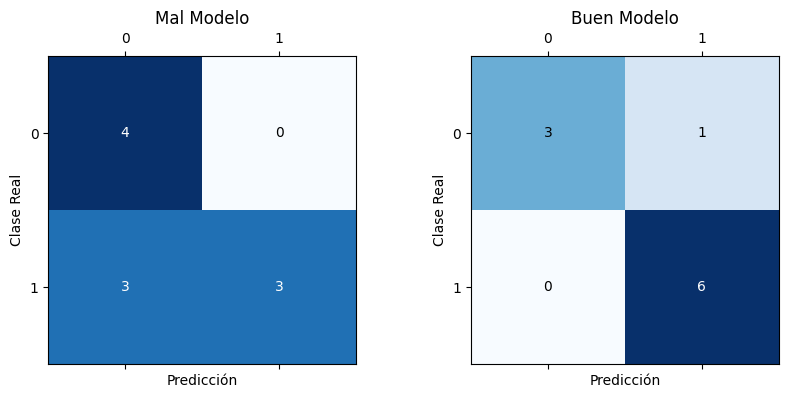

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score

# Simulación de predicciones para un problema de detección de fallas (1 = Falla, 0 = Normal)
y_real = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])  # Clases reales

# Mal modelo: Baja sensibilidad (no detecta bien las fallas)
y_pred_malo = np.array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

# Buen modelo: Alta sensibilidad (detecta casi todas las fallas)
y_pred_bueno = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

# Calcular Recall
recall_malo = recall_score(y_real, y_pred_malo)
recall_bueno = recall_score(y_real, y_pred_bueno)

print(f"Recall modelo malo: {recall_malo:.2f}")
print(f"Recall modelo bueno: {recall_bueno:.2f}")

# Mostrar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, y_pred, title in zip(axes, [y_pred_malo, y_pred_bueno], ["Mal Modelo", "Buen Modelo"]):
    matriz = confusion_matrix(y_real, y_pred)
    ax.matshow(matriz, cmap=plt.cm.Blues)
    for (i, j), val in np.ndenumerate(matriz):
        ax.text(j, i, f"{val}", ha='center', va='center', color="white" if val > matriz.max()/2 else "black")
    ax.set_title(title)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Clase Real")

plt.show()


#  CASO 2: PRIORIDAD EN PRECISION

## **Problema:** Clasificación de candidatos para un trabajo de alto perfil

- Queremos minimizar los falsos positivos, es decir, no queremos contratar a alguien no calificado.
- Es preferible rechazar algunos buenos candidatos (falso negativo) que contratar a alguien no apto (falso positivo), clase 1.
- Ejemplo de un buen y mal modelo respecto a Precision.



Precision modelo malo: 0.43
Precision modelo bueno: 1.00


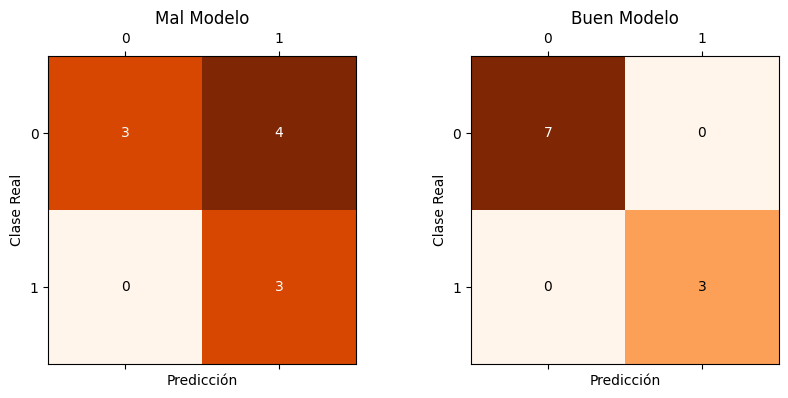

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score

# Simulación de predicciones para diagnóstico médico (1 = Enfermo, 0 = Sano)
y_real = np.array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0])  # Clases reales

# Mal modelo: Baja precisión (muchos falsos positivos)
y_pred_malo = np.array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

# Buen modelo: Alta precisión (detecta bien sin dar falsos positivos)
y_pred_bueno = np.array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

# Calcular Precision
precision_malo = precision_score(y_real, y_pred_malo)
precision_bueno = precision_score(y_real, y_pred_bueno)

print(f"Precision modelo malo: {precision_malo:.2f}")
print(f"Precision modelo bueno: {precision_bueno:.2f}")

# Mostrar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, y_pred, title in zip(axes, [y_pred_malo, y_pred_bueno], ["Mal Modelo", "Buen Modelo"]):
    matriz = confusion_matrix(y_real, y_pred)
    ax.matshow(matriz, cmap=plt.cm.Oranges)
    for (i, j), val in np.ndenumerate(matriz):
        ax.text(j, i, f"{val}", ha='center', va='center', color="white" if val > matriz.max()/2 else "black")
    ax.set_title(title)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Clase Real")

plt.show()


# <font color='purple' style='bold' size=5>**MATERIAL ADICIONAL** </font>


[Regresión Logística 📈 En Python 🐍 - Rafa Gonzalez Gouveia](https://www.youtube.com/watch?v=BHok3wJpmf0&ab_channel=RafaGonzalezGouveia): En este video vemos un ejemplo de aplicación de la regresión logística con la explicación del modelo o algoritmo de machine learning.

### <font color='purple'>**FIN MATERIAL ADICIONAL** </font>
